In [1]:
import sys
sys.path.append("../")

In [2]:
import numpy as np
from experiment_analysis import analyze_and_plot_features

# Server 

INFO:experiment_analysis.experiment_analysis:Analyzing feature 'num_users' with fixed params: {'countries': ['US', 'UK', 'DE', 'FR', 'CA', 'AU', 'JP', 'IN'], 'platforms': ['iOS', 'Android', 'Web', 'Desktop'], 'user_segments': ['Segment_1', 'Segment_2', 'Segment_3', 'Segment_4'], 'ab_groups': ['a1', 'b'], 'base_increase_percentage': 0.01, 'noise_level': 0.0, 'alpha': 0.0}
100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:32<00:00,  3.65s/it]


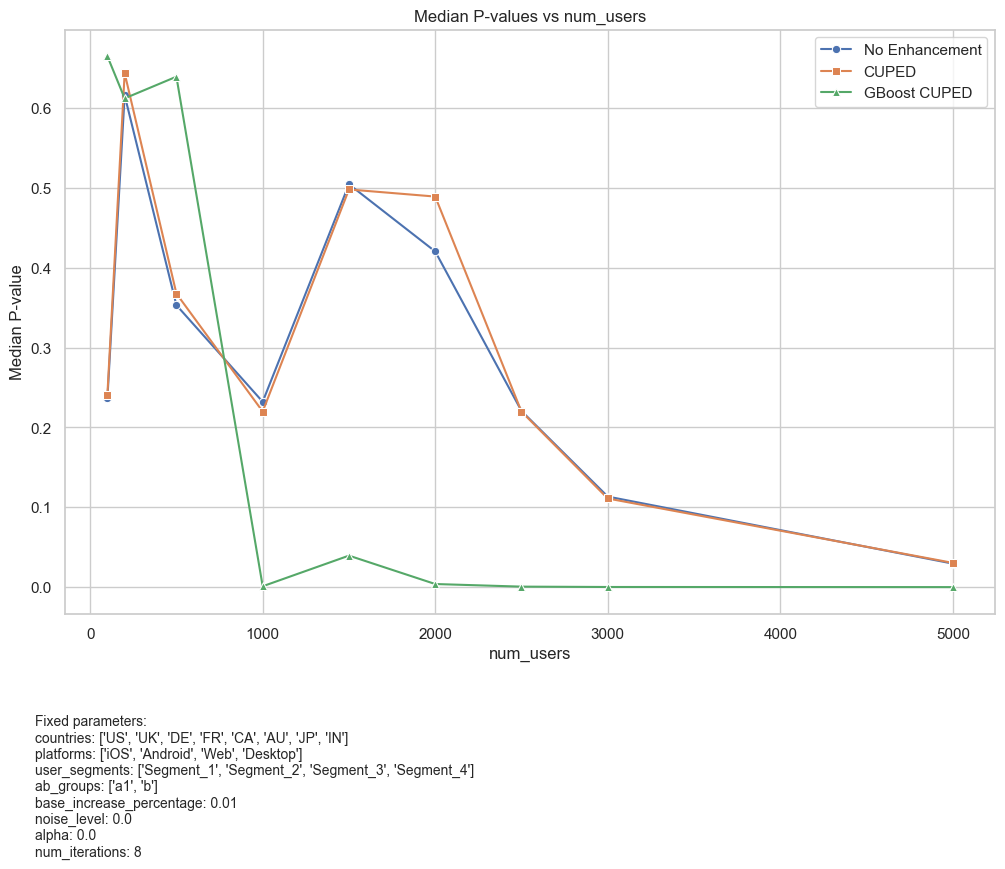

INFO:experiment_analysis.experiment_analysis:Analyzing feature 'num_users' with fixed params: {'countries': ['US', 'UK', 'DE', 'FR', 'CA', 'AU', 'JP', 'IN'], 'platforms': ['iOS', 'Android', 'Web', 'Desktop'], 'user_segments': ['Segment_1', 'Segment_2', 'Segment_3', 'Segment_4'], 'ab_groups': ['a1', 'b'], 'base_increase_percentage': 0.01, 'noise_level': 0.0, 'alpha': 0.25}
 33%|████████████████████████████████████████████▋                                                                                         | 3/9 [00:09<00:18,  3.00s/it]


KeyboardInterrupt: 

In [35]:
# Define fixed parameters that do not change during the analysis
fixed_params = {
    'countries': ['US', 'UK', 'DE', 'FR', 'CA', 'AU', 'JP', 'IN'],  # List of countries to be analyzed
    'platforms': ['iOS', 'Android', 'Web', 'Desktop'],  # Platforms to be included in the analysis
    'user_segments': ['Segment_1', 'Segment_2', 'Segment_3', 'Segment_4'],  # User segments to be considered
    'ab_groups': ['a1', 'b'],  # A/B test groups
}

# Define parameters with ranges
varying_params = {
    'base_increase_percentage': np.array([0, 0.01, 0.5, 0.1]),
    'noise_level': np.array([0, 0.2, 0.6, 1]),
    'alpha': np.array([0, 0.25, 0.5, 0.75, 1]),
}

# Define parameters with ranges to be used as the X-axis
x_params = {
    'num_users': np.array([100, 200, 500, 1000, 1500, 2000, 2500, 3000, 5000])
}

# Call the function to analyze and plot for all selected features
analyze_and_plot_features(
    fixed_params, 
    varying_params, 
    x_params, 
    num_iterations=8,  # Number of iterations to perform for each analysis
)
